<a href="https://colab.research.google.com/github/hitanshu5/MachineLearning/blob/main/MLMiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
train_df = pd.read_excel('/content/Flight_train.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [65]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [66]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [67]:
train_df[train_df['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [68]:
train_df.drop(9039,axis=0,inplace=True)

In [69]:
train_df[train_df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


null values of Route and Total Stops were in the same tuple

In [70]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [71]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [72]:
train_df['Date']=train_df['Date_of_Journey'].str.split('/').str[0]
train_df['Month']=train_df['Date_of_Journey'].str.split('/').str[1]
train_df['Year']=train_df['Date_of_Journey'].str.split('/').str[2]
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [73]:
train_df.drop(columns=['Date_of_Journey'],inplace=True)

In [74]:
train_df['Date'] = train_df['Date'].astype(int)
train_df['Month'] = train_df['Month'].astype(int)
train_df['Year'] = train_df['Year'].astype(int)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10682 non-null  object
 9   Price            10682 non-null  int64 
 10  Date             10682 non-null  int64 
 11  Month            10682 non-null  int64 
 12  Year             10682 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.4+ MB


In [75]:
train_df['Dept_Hour']=train_df['Dep_Time'].str.split(':').str[0]
train_df['Dept_Min']=train_df['Dep_Time'].str.split(':').str[1]

In [76]:
train_df['Dept_Hour']=train_df['Dept_Hour'].astype(int)
train_df['Dept_Min']=train_df['Dept_Min'].astype(int)
train_df.drop(columns=['Dep_Time'],inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Arrival_Time     10682 non-null  object
 5   Duration         10682 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10682 non-null  object
 8   Price            10682 non-null  int64 
 9   Date             10682 non-null  int64 
 10  Month            10682 non-null  int64 
 11  Year             10682 non-null  int64 
 12  Dept_Hour        10682 non-null  int64 
 13  Dept_Min         10682 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 1.5+ MB


In [77]:
train_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dept_Hour,Dept_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [78]:
train_df['Arrival_Time']=train_df['Arrival_Time'].str.split(' ').str[0]
train_df['Arrival_Hour']=train_df['Arrival_Time'].str.split(':').str[0]
train_df['Arrival_Min']=train_df['Arrival_Time'].str.split(':').str[1]
train_df['Arrival_Hour']=train_df['Arrival_Hour'].astype(int)
train_df['Arrival_Min']=train_df['Arrival_Min'].astype(int)
train_df.drop(columns=['Arrival_Time'],inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10682 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   Date             10682 non-null  int64 
 9   Month            10682 non-null  int64 
 10  Year             10682 non-null  int64 
 11  Dept_Hour        10682 non-null  int64 
 12  Dept_Min         10682 non-null  int64 
 13  Arrival_Hour     10682 non-null  int64 
 14  Arrival_Min      10682 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 1.6+ MB


In [79]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dept_Hour,Dept_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [80]:
 train_df['Duration_Hour'] = train_df['Duration'].str.split(' ').str[0].str.split('h').str[0]
 train_df['Duration_Min'] = train_df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [81]:
train_df[train_df['Duration']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dept_Hour,Dept_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,17327,6,3,2019,16,50,16,55,5m,NaN


In [82]:
train_df.drop(6474,axis=0,inplace=True)

In [83]:
train_df['Duration_Hour'] = train_df['Duration_Hour'].astype(int)

In [84]:
train_df['Duration_Min'].unique()

array(['50', '25', nan, '45', '30', '5', '15', '35', '10', '20', '55',
       '40'], dtype=object)

In [85]:
train_df['Duration_Min'].fillna(0,inplace=True)

In [86]:
train_df['Duration_Min'] = train_df['Duration_Min'].astype(int)

In [87]:
train_df.drop(columns=['Duration'],inplace=True)

In [88]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10681 non-null  object
 1   Source           10681 non-null  object
 2   Destination      10681 non-null  object
 3   Route            10681 non-null  object
 4   Total_Stops      10681 non-null  object
 5   Additional_Info  10681 non-null  object
 6   Price            10681 non-null  int64 
 7   Date             10681 non-null  int64 
 8   Month            10681 non-null  int64 
 9   Year             10681 non-null  int64 
 10  Dept_Hour        10681 non-null  int64 
 11  Dept_Min         10681 non-null  int64 
 12  Arrival_Hour     10681 non-null  int64 
 13  Arrival_Min      10681 non-null  int64 
 14  Duration_Hour    10681 non-null  int64 
 15  Duration_Min     10681 non-null  int64 
dtypes: int64(10), object(6)
memory usage: 1.4+ MB


In [89]:
train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Dept_Hour,Dept_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [90]:
train_df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1750
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

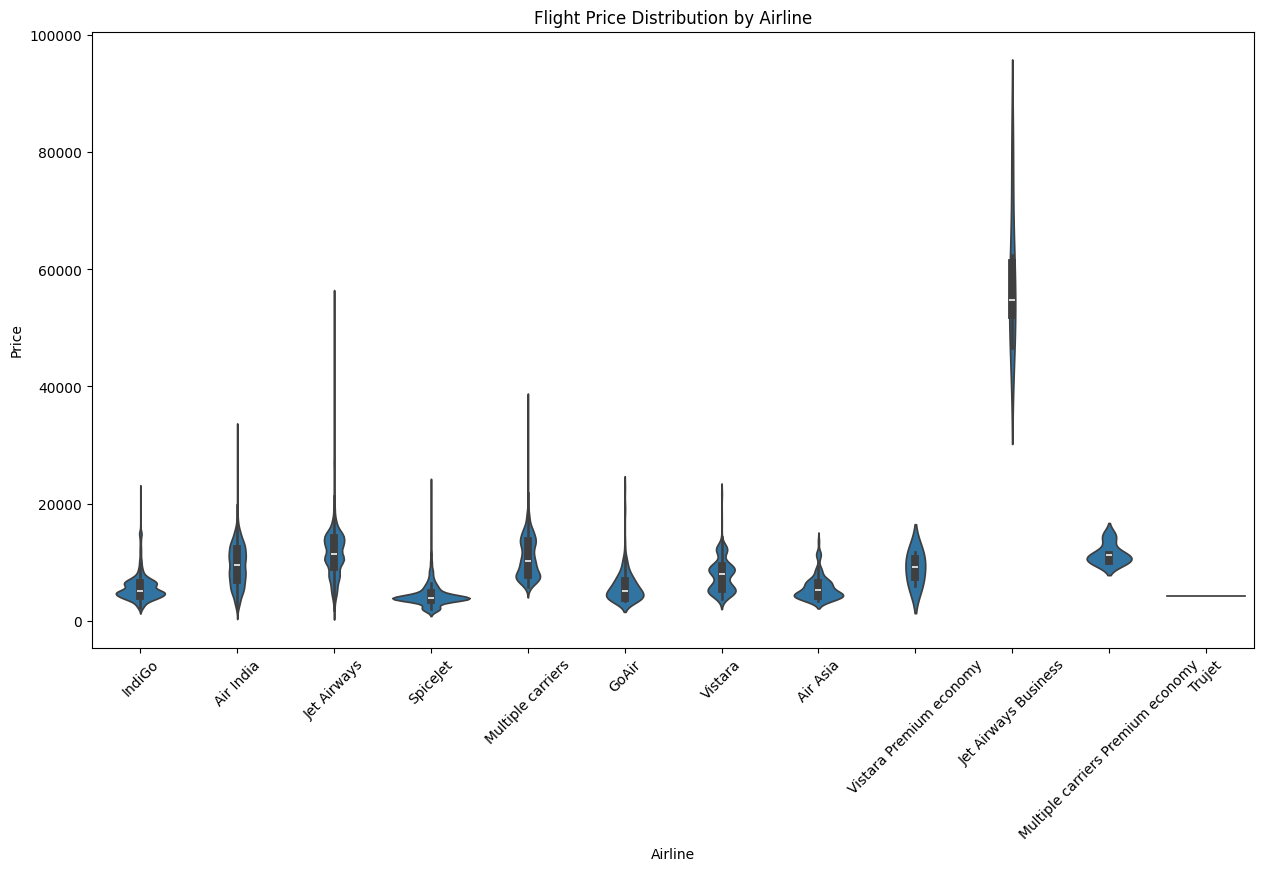

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
sns.violinplot(x='Airline', y='Price', data=train_df)
plt.xticks(rotation=45)
plt.title('Flight Price Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()

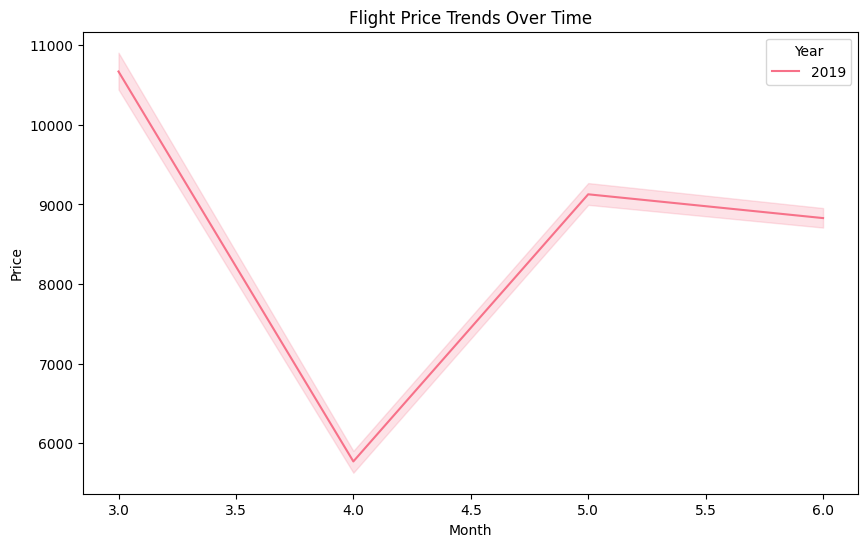

In [92]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Price', hue='Year', data=train_df, palette='husl')
plt.title('Flight Price Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend(title='Year')
plt.show()

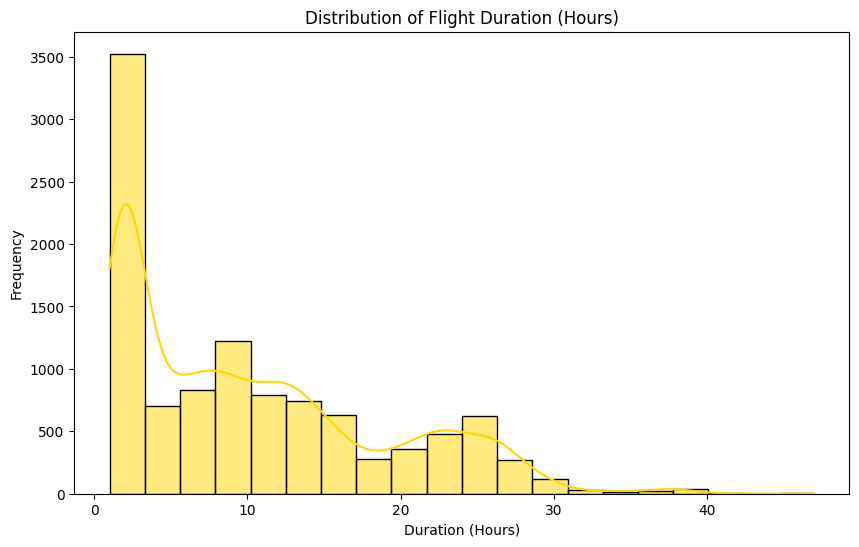

In [93]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Duration_Hour'], bins=20, kde=True, color='gold')
plt.title('Distribution of Flight Duration (Hours)')
plt.xlabel('Duration (Hours)')
plt.ylabel('Frequency')
plt.show()

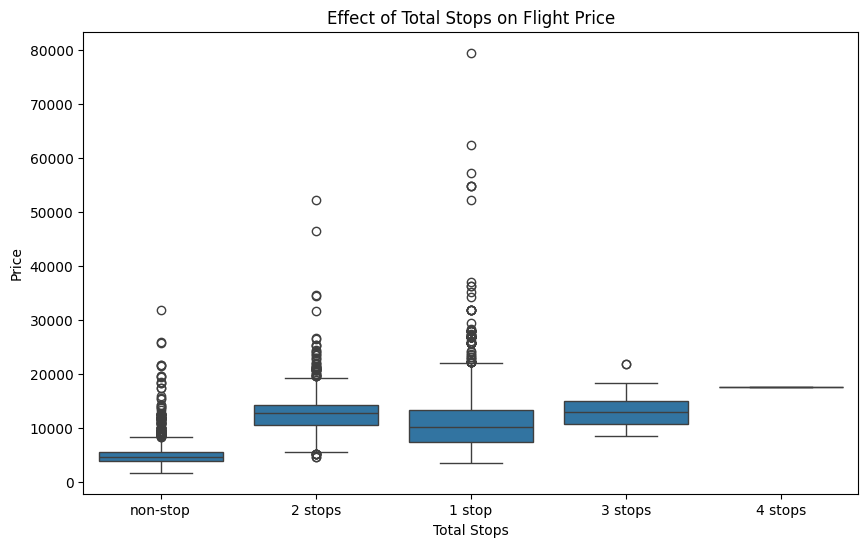

In [94]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Total_Stops', y='Price', data=train_df)
plt.title('Effect of Total Stops on Flight Price')
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.show()

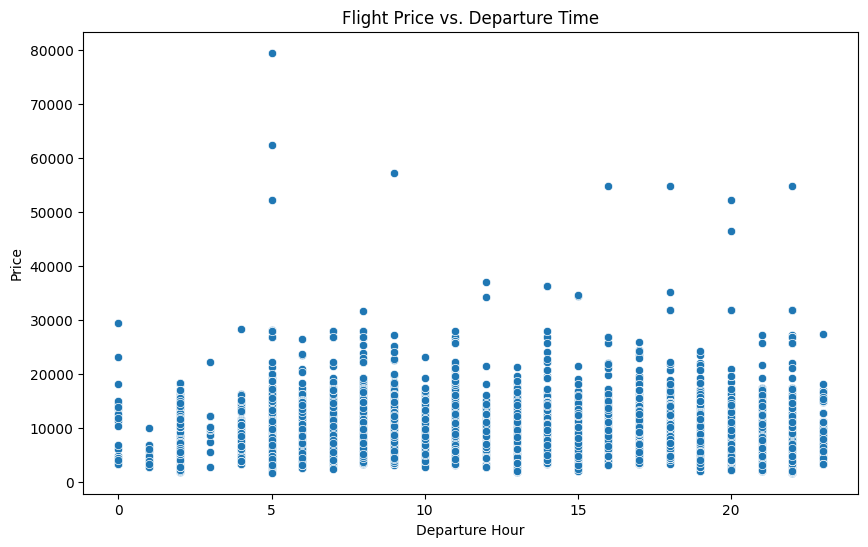

In [95]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dept_Hour', y='Price', data=train_df)
plt.title('Flight Price vs. Departure Time')
plt.xlabel('Departure Hour')
plt.ylabel('Price')
plt.show()

In [96]:
Airline = train_df[['Airline']]
Current_Airline_List = Airline['Airline']
New_Airline_List = []

for carrier in Current_Airline_List:
  if carrier in ['Jet Airways','IndiGo','Air India','Multiple carriers','SpiceJet','Vistara','Air Asia','GoAir']:
    New_Airline_List.append(carrier)
  else:
    New_Airline_List.append('other')

Airline['Airline'] = pd.DataFrame(New_Airline_List)
Airline['Airline'].value_counts()

<ipython-input-96-fd259cce665f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline'] = pd.DataFrame(New_Airline_List)


Airline
Jet Airways          3849
IndiGo               2053
Air India            1749
Multiple carriers    1195
SpiceJet              818
Vistara               479
Air Asia              319
GoAir                 194
other                  23
Name: count, dtype: int64

In [97]:
Airline = pd.get_dummies(Airline, drop_first=True)
Airline = Airline.astype(int)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Airline_other
0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [98]:
train_df['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: count, dtype: int64

In [99]:
Source = train_df[['Source']]
Source = pd.get_dummies(Source, drop_first=True)
Source = Source.astype(int)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [100]:
train_df['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
Name: count, dtype: int64

In [101]:
Destination = train_df[['Destination']]
Current_Destination_List = Destination['Destination']
New_Destination_List = []

for value in Current_Destination_List:
  if value in ['New Delhi']:
    New_Destination_List.append('Delhi')
  else:
    New_Destination_List.append(value)

Destination['Destination'] = pd.DataFrame(New_Destination_List)

<ipython-input-101-ebe440b05c8b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Destination['Destination'] = pd.DataFrame(New_Destination_List)


In [102]:
Destination = pd.get_dummies(Destination,drop_first=True)
Destination = Destination.astype(int)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [103]:
train_df.drop(columns=['Route','Additional_Info'],inplace=True)

In [104]:
train_df['Total_Stops']=train_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dept_Hour,Dept_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


In [105]:
final_df = pd.concat([train_df,Airline,Source,Destination],axis=1)
final_df.drop(columns=['Airline','Source','Destination'],inplace=True)

final_df.head()

,Total_Stops,Price,Date,Month,Year,Dept_Hour,Dept_Min,Arrival_Hour,Arrival_Min,Duration_Hour,...,Airline_Vistara,Airline_other,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,2019,22,20,1,10,2,...,0,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,2019,5,50,13,15,7,...,0,0,0,0,1,0,0,0,0,0
2,2,13882,9,6,2019,9,25,4,25,19,...,0,0,0,1,0,0,1,0,0,0
3,1,6218,12,5,2019,18,5,23,30,5,...,0,0,0,0,1,0,0,0,0,0
4,1,13302,1,3,2019,16,50,21,35,4,...,0,0,0,0,0,0,0,1,0,0


In [107]:
print(final_df.shape)

(10681, 27)
